<a href="https://colab.research.google.com/github/surendrakambella/HACKATHON-time-series-forecasting-in-education/blob/main/SARIMA_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Name         : **HACK HEROES**

Team Leader       : K.Surendra

Team members      : A.Hari Sai Bhaskar
                    B.V.Suryanarayana
                    G.Samuel Kiran Babu

Problem Statement : Time Series Forecasting in Education



**Importing the Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Importing Dataset**


In [ ]:
df = pd.read_csv("/content/hack.csv")

In [ ]:
df.head()

,Year,Enrollement Numbers,CSE,ECE,MECH,EEE,Male,Female,Pass %,No of People Placed
0,1967-1968,500,100,103,190,107,450,50,66%,150
1,1968-1969,550,109,110,222,109,459,91,70%,175
2,1969-1970,450,77,78,219,76,375,75,71%,185
3,1970-1971,400,66,67,199,68,350,50,65%,200
4,1971-1972,540,105,111,225,99,480,60,69%,300


In [ ]:
df.tail()

,Year,Enrollement Numbers,CSE,ECE,MECH,EEE,Male,Female,Pass %,No of People Placed
51,2018-2019,1350,576,235,247,292,800,550,88%,533
52,2019-2020,1532,675,333,289,235,832,700,89%,599
53,2020-2021,1899,896,334,337,332,1000,899,85%,753
54,2021-2022,1918,976,345,456,141,1018,900,88.50%,579
55,2022-2023,2034,1086,335,334,279,1024,1010,91%,876


In [ ]:
df.shape

(56, 10)

In [ ]:
df.describe()

,Enrollement Numbers,CSE,ECE,MECH,EEE,Male,Female,No of People Placed
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,825.410714,252.142857,183.339286,197.678571,194.035714,540.803571,280.214286,363.410714
std,381.368196,218.889713,78.932716,77.369975,73.679395,168.898401,251.871303,158.494482
min,345.000000,60.000000,54.000000,40.000000,64.000000,280.000000,32.000000,150.000000
25%,562.000000,128.750000,110.750000,154.000000,142.500000,423.500000,76.500000,227.500000
50%,725.000000,182.500000,178.500000,190.000000,198.000000,500.000000,151.500000,353.000000
75%,980.000000,260.500000,244.750000,234.250000,257.500000,604.500000,480.000000,453.500000
max,2034.000000,1086.000000,345.000000,456.000000,348.000000,1024.000000,1010.000000,876.000000


In [ ]:
df.columns

Index(['Year', 'Enrollement Numbers', 'CSE', 'ECE', 'MECH', 'EEE', 'Male',
       'Female', 'Pass %', 'No of People Placed'],
      dtype='object')

In [ ]:
df.size

560

In [ ]:
df.dtypes

Year                   object
Enrollement Numbers     int64
CSE                     int64
ECE                     int64
MECH                    int64
EEE                     int64
Male                    int64
Female                  int64
Pass %                 object
No of People Placed     int64
dtype: object

In [ ]:
df.count()

Year                   56
Enrollement Numbers    56
CSE                    56
ECE                    56
MECH                   56
EEE                    56
Male                   56
Female                 56
Pass %                 56
No of People Placed    56
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 56 non-null     object
 1   Enrollement Numbers  56 non-null     int64 
 2   CSE                  56 non-null     int64 
 3   ECE                  56 non-null     int64 
 4   MECH                 56 non-null     int64 
 5   EEE                  56 non-null     int64 
 6   Male                 56 non-null     int64 
 7   Female               56 non-null     int64 
 8   Pass %               56 non-null     object
 9   No of People Placed  56 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 4.5+ KB



**Handling Missing Values**



In [ ]:
df.isnull().sum()

Year                   0
Enrollement Numbers    0
CSE                    0
ECE                    0
MECH                   0
EEE                    0
Male                   0
Female                 0
Pass %                 0
No of People Placed    0
dtype: int64


**Visualization**


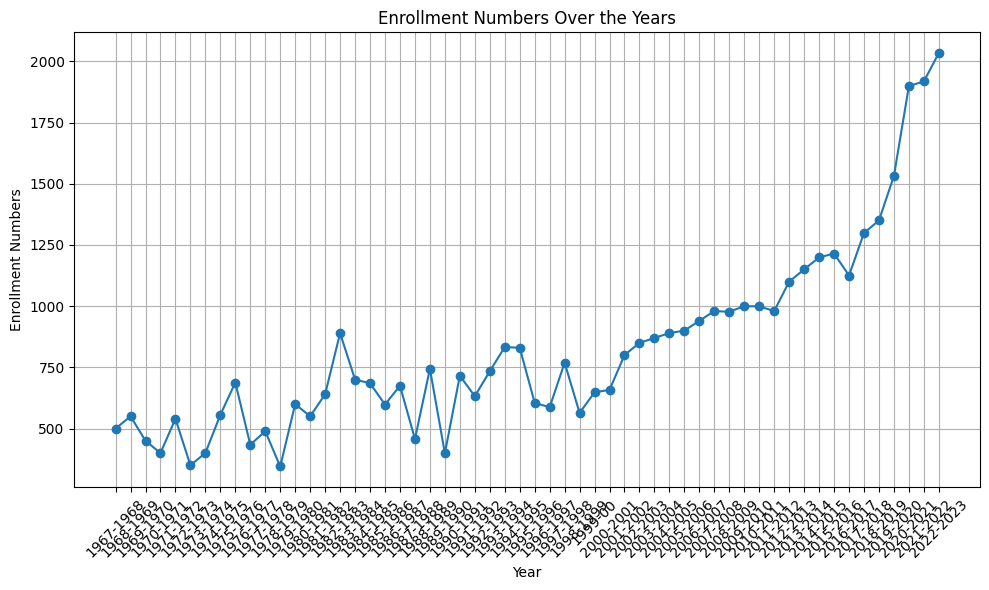

In [ ]:
# Assuming df contains the loaded dataset
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Enrollement Numbers'], marker='o', linestyle='-')
plt.title('Enrollment Numbers Over the Years')
plt.xlabel('Year')
plt.ylabel('Enrollment Numbers')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

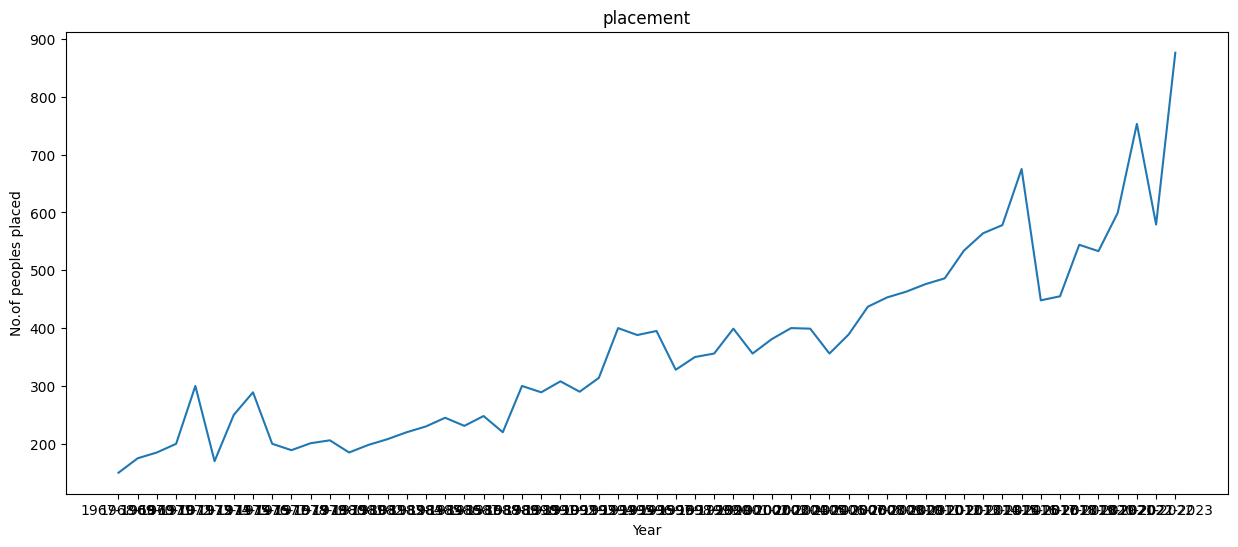

In [ ]:
x = df["Year"]
y = df["No of People Placed"]
plt.figure(figsize=(15, 6))
plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("No.of peoples placed")
plt.title("placement")
plt.show()

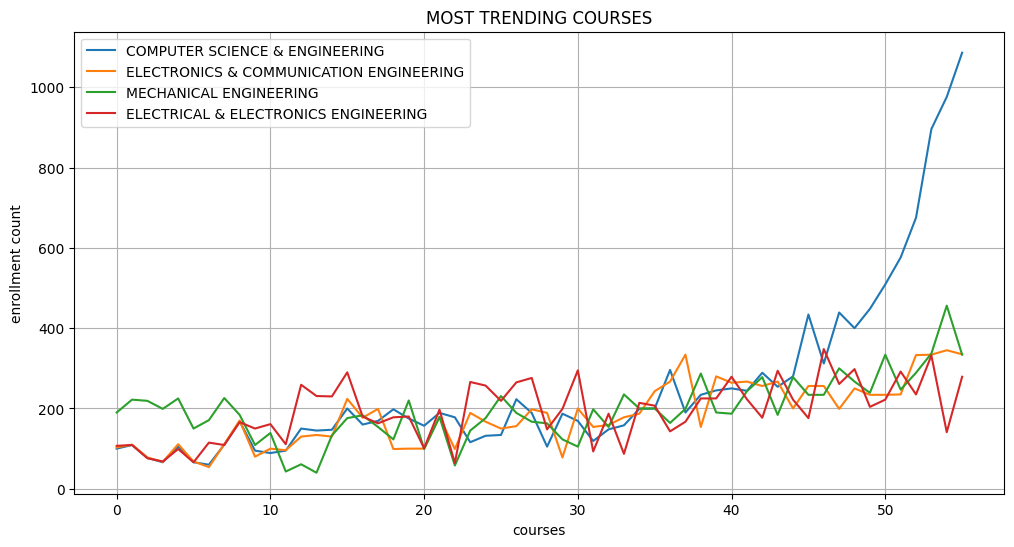

In [ ]:
# Assuming df is your DataFrame
column1 = 'CSE'
column2 = 'ECE'
column3 = 'MECH'
column4 = 'EEE'

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plotting multiple lines on the same figure
plt.plot(df.index, df[column1], label='COMPUTER SCIENCE & ENGINEERING')
plt.plot(df.index, df[column2], label='ELECTRONICS & COMMUNICATION ENGINEERING')
plt.plot(df.index, df[column3], label='MECHANICAL ENGINEERING')
plt.plot(df.index, df[column4], label='ELECTRICAL & ELECTRONICS ENGINEERING')

plt.legend()

plt.title('MOST TRENDING COURSES')
plt.xlabel('courses')
plt.ylabel('enrollment count')
plt.grid(True)
plt.show()

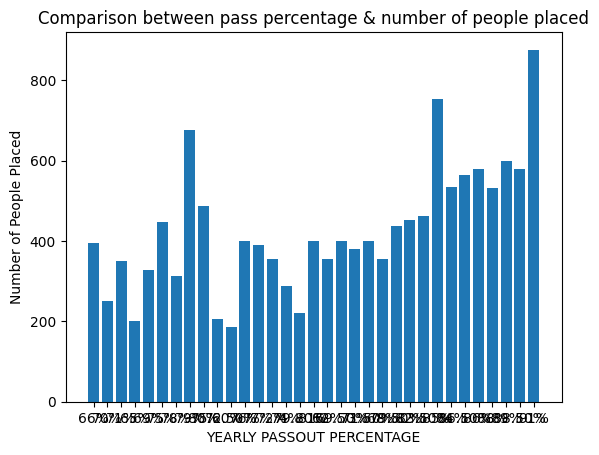

In [ ]:
x = df["Pass %"]  # Replace "Pass %" with the actual column name
y = df["No of People Placed"]  # Replace "No of People Placed" with the actual column name

plt.bar(x, y)

plt.xlabel("YEARLY PASSOUT PERCENTAGE")
plt.ylabel("Number of People Placed")
plt.title("Comparison between pass percentage & number of people placed")

plt.show()


**Importing Libraries and Loading the Dataset**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

df = pd.read_csv("/content/hack.csv")

# Extract the year and set it as the index
df["Year"] = pd.to_datetime(df["Year"].str.split('-').str[0], format="%Y")
df.set_index("Year", inplace=True)

# Specify the frequency explicitly
df.index.freq = 'AS'

enrollment = df["Enrollement Numbers"]

# Use the past 1 years for training the model
train_years = 1
train_data = enrollment[:-train_years]



**Fitting the Trained Data into a  SARIMA model**


In [ ]:
order = (1, 1, 0)  # we can adjust these values based on your analysis
seasonal_order = (1, 1, 0, 12)  # Seasonal component (12 months in a year)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)


**Forecast enrollments**


In [ ]:
# Forecast enrollments for the next 3 years (2024, 2025, 2026)
future_years = 2
forecast = model_fit.get_forecast(steps=future_years)

# Extract predicted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Extend the index to include the forecasted years
forecast_values.index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=future_years, freq='AS')
# Print the forecasted values and confidence intervals
print("Forecasted Values:")
print(forecast_values)

Forecasted Values:
2023-01-01    1885.392475
2024-01-01    1881.412969
Freq: AS-JAN, Name: predicted_mean, dtype: float64



**Calculating RMSE**


Root Mean Squared Error (RMSE): 110.33143869110152
Accuracy Percentage (RMSE as a percentage of the range): 93.47%


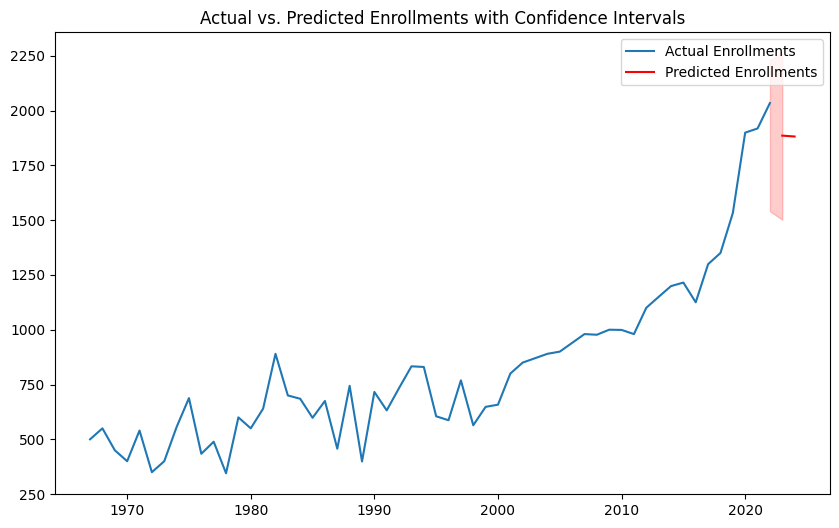

In [ ]:
# Calculate RMSE
actual_values = enrollment[-future_years:]
rmse = sqrt(mean_squared_error(actual_values, forecast_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate RMSE as a percentage of the range of the data
rmse_percentage = (rmse / (enrollment.max() - enrollment.min())) * 100
print(f"Accuracy Percentage (RMSE as a percentage of the range): {100 - rmse_percentage:.2f}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(enrollment, label='Actual Enrollments')
plt.plot(forecast_values.index, forecast_values, label='Predicted Enrollments', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.2)
plt.title('Actual vs. Predicted Enrollments with Confidence Intervals')
plt.legend()


**Predicting the Enrollement Count in particular Course**


Forecasted Values for CSE Group:
2023-01-01    866.061235
2024-01-01    838.004429
2025-01-01    861.845979
Freq: AS-JAN, Name: predicted_mean, dtype: float64
Root Mean Squared Error (RMSE) for CSE Group: 152.9532962810436
Accuracy Percentage (RMSE as a percentage of the range) for CSE Group: 85.09%


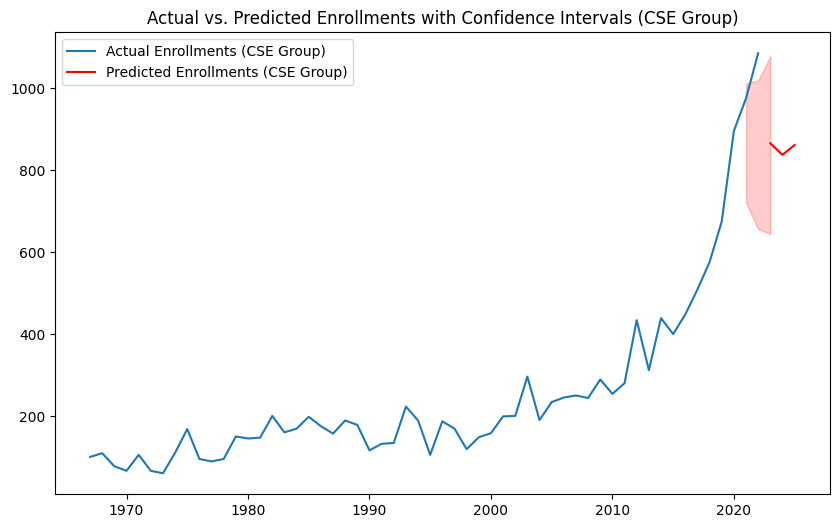

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_csv("/content/hack.csv")

# Extract the year and set it as the index
df["Year"] = pd.to_datetime(df["Year"].str.split('-').str[0], format="%Y")
df.set_index("Year", inplace=True)

# Specify the frequency explicitly
df.index.freq = 'AS'

# Select the relevant column for the CSE group
cse_enrollment = df["CSE"]

# Use the past 5 years for training the model
train_years = 2
train_data_cse = cse_enrollment[:-train_years]

# Fit a SARIMA model for the CSE group
order_cse = (1, 1, 0)  # You can adjust these values based on your analysis
seasonal_order_cse = (1, 1, 0, 12)  # Seasonal component (12 months in a year)
model_cse = SARIMAX(train_data_cse, order=order_cse, seasonal_order=seasonal_order_cse)
model_fit_cse = model_cse.fit(disp=False)

# Forecast enrollments for the next 3 years (2024, 2025, 2026) for the CSE group
future_years = 3
forecast_cse = model_fit_cse.get_forecast(steps=future_years)

# Extract predicted values and confidence intervals for the CSE group
forecast_values_cse = forecast_cse.predicted_mean
confidence_intervals_cse = forecast_cse.conf_int()

# Extend the index to include the forecasted years
forecast_values_cse.index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=future_years, freq='AS')

# Print the forecasted values and confidence intervals for the CSE group
print("Forecasted Values for CSE Group:")
print(forecast_values_cse)

# Calculate RMSE for the CSE group
actual_values_cse = cse_enrollment[-future_years:]
rmse_cse = sqrt(mean_squared_error(actual_values_cse, forecast_values_cse))
print(f"Root Mean Squared Error (RMSE) for CSE Group: {rmse_cse}")

# Calculate RMSE as a percentage of the range of the data for the CSE group
rmse_percentage_cse = (rmse_cse / (cse_enrollment.max() - cse_enrollment.min())) * 100
print(f"Accuracy Percentage (RMSE as a percentage of the range) for CSE Group: {100 - rmse_percentage_cse:.2f}%")

# Plot actual vs. predicted values for the CSE group
plt.figure(figsize=(10, 6))
plt.plot(cse_enrollment, label='Actual Enrollments (CSE Group)')
plt.plot(forecast_values_cse.index, forecast_values_cse, label='Predicted Enrollments (CSE Group)', color='red')
plt.fill_between(confidence_intervals_cse.index, confidence_intervals_cse.iloc[:, 0], confidence_intervals_cse.iloc[:, 1], color='red', alpha=0.2)
plt.title('Actual vs. Predicted Enrollments with Confidence Intervals (CSE Group)')
plt.legend()
plt.show()